# Características de los Océanos
En esta actividad se revisará la distribución superficial y vertical, de la temperatura, salinidad y densidad de los océanos.

Es necesario familiarizarse con el World Ocean Atlas 2013 (WOA13). **LECTURA:**
1) https://data.nodc.noaa.gov/woa/WOA13/DOC/woa13documentation.pdf
2) https://www.opendap.org/

In [1]:
from netCDF4 import Dataset
import numpy as np
from IPython.display import Image
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
par='temp'

In [2]:
url='http://apdrc.soest.hawaii.edu:80/dods/public_data/WOA/WOA13/1_deg/monthly/'+par
dat=Dataset(url)

In [3]:
dat.variables

OrderedDict([('time', <class 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  grads_dim: t
                  grads_mapping: linear
                  grads_size: 12
                  grads_min: 00z15jan0000
                  grads_step: 1mo
                  units: days since 1-1-1 00:00:0.0
                  long_name: time
                  minimum: 00z15jan0000
                  maximum: 00z15dec0000
                  resolution: 30.4545
              unlimited dimensions: 
              current shape = (12,)
              filling off), ('lev', <class 'netCDF4._netCDF4.Variable'>
              float64 lev(lev)
                  grads_dim: z
                  grads_mapping: levels
                  units: millibar
                  long_name: altitude
                  minimum: 0.0
                  maximum: 1500.0
                  resolution: 26.7857
              unlimited dimensions: 
              current shape = (57,)
              filling off), ('

In [4]:
lat=dat.variables['lat'][:]
lon=dat.variables['lon'][:]
lev=dat.variables['lev'][:]
time=dat.variables['time'][:]
temp=dat.variables['tan'][0,0,:,:]         #4 dimensiones [tiempo,nivel,lat,lon]

La variable **'temp'** contiene los datos de las temperatura superficial del mar. La forma en como esta matriz está organizada es la siguiente: [TIEMPO, NIVEL, LATITUD, LONGITUD]. La matriz tiene 4 dimensiones. La dimensión **Tiempo** tiene una longitud de 12, indicando cada uniudad un mes, siendo el `índice 0` el mes de Enero y 11 el mes de Diciembre. La dimensión **Nivel** corresponde a las diferentes capas, siendo el `índice 0` la superficie y el `índice 56` el fondo con una valor de 1500 metros.

In [5]:
lev                          #Valores alojados en el vector "lev"

array([    0.,     5.,    10.,    15.,    20.,    25.,    30.,    35.,
          40.,    45.,    50.,    55.,    60.,    65.,    70.,    75.,
          80.,    85.,    90.,    95.,   100.,   125.,   150.,   175.,
         200.,   225.,   250.,   275.,   300.,   325.,   350.,   375.,
         400.,   425.,   450.,   475.,   500.,   550.,   600.,   650.,
         700.,   750.,   800.,   850.,   900.,   950.,  1000.,  1050.,
        1100.,  1150.,  1200.,  1250.,  1300.,  1350.,  1400.,  1450.,
        1500.])

La dimensión **Nivel** corresponde a la profundidad, mientras que **Latitud y Longitud** corresponden a las coordenadas horizontales. La siguiente imágen facilita esta representación.

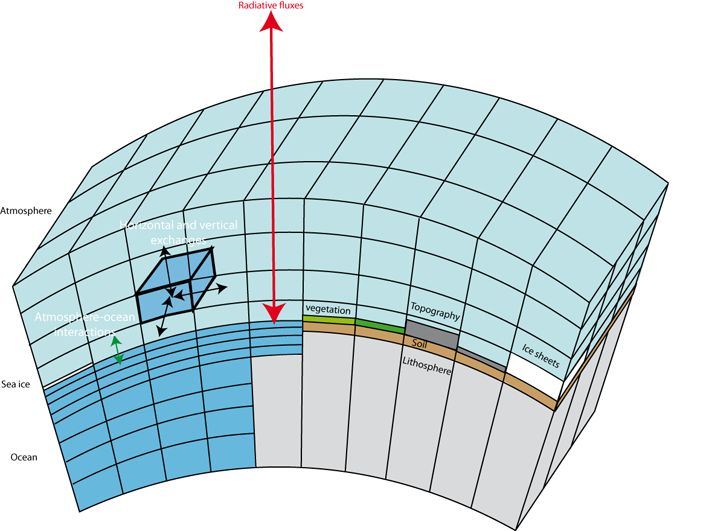

In [6]:
Image('http://www.climate.be/textbook/images/image3x05.png',width=800)

Explorando este *dataset* utilizando las librerias Numpy y Matplotlib, podemos encontrar cuál sería la temperatura típica  del océano para el mes de Enero (Considerando el rango de esta climatología)

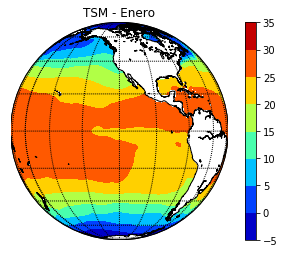

In [7]:
m = Basemap(projection='ortho',lat_0=0,lon_0=-120,resolution='l')
x,y  = np.meshgrid(lon,lat)
X, Y = m(x, y)
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(X,Y,temp,cmap=plt.cm.jet)
plt.title('TSM - Enero')
plt.colorbar(cs)
plt.show()

Si queremos conocer la temperatura en las profundidades (i.e. 1500 metros) sólo basta con cambiar el índice correspondiente a la profundiad en la variable **temp**

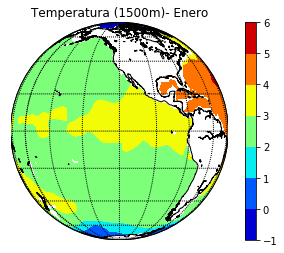

In [8]:
temp=dat.variables['tan'][0,-1,:,:] 
m = Basemap(projection='ortho',lat_0=0,lon_0=-120,resolution='l')
x,y  = np.meshgrid(lon,lat)
X, Y = m(x, y)
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(X,Y,temp,cmap=plt.cm.jet)
plt.title('Temperatura (1500m)- Enero')
plt.colorbar(cs)
plt.show()

Con Numpy, podemos calcular de forma rápida algunas operaciones estadísticas (e.g. promedio, maximo, mínimo) con los valores de matrices de N dimensiones.

Veamos por ejemplo, el cálculo de los valores promedios de temperatura superficial del mar, de acuerdo a nuestra climatología.

In [9]:
temp=dat.variables['tan'][:,0,:,:]      #Todos los meses (Ene-Dic) los valores de la capa superficial
prom=temp.mean(axis=0)                  #El promedio de los 12 meses para cada celda del dominio

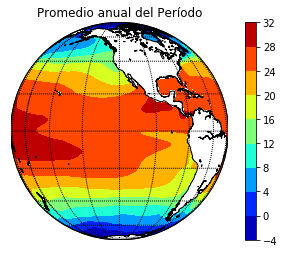

In [10]:
m = Basemap(projection='ortho',lat_0=0,lon_0=-120,resolution='l')
x,y  = np.meshgrid(lon,lat)
X, Y = m(x, y)
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(X,Y,prom,cmap=plt.cm.jet)
plt.title('Promedio anual del Período')
plt.colorbar(cs)
plt.show()

Asimismo, se puede obtener el valores estadísticos de todos los valores de la matriz. Establecer por ejemplo, cuál es el valor promedio de todos los valores de la matriz.

In [11]:
prom.mean()                 #Valor promedio de todas las celdas de la matriz prom

13.902871826215994

Es decir, la temperatura media del océano es **13.90 C**, esto es, considerando nuestros cálculo previo del promedio. 

# TAREAS
## 1) Obtener los valores máximos y mínimos de Temperatura Superficial del Mar para cada mes. Grafique en un plot, esta serie de tiempo.
Ejemplo: Enero: -1C , 32C
## 2) Obtener  para todo el globo, los valores superficiales y de la capa de 1500m de temperatura y salinidad para los meses en los que ocurre el cambio estacional. Analice sus hallazgos. Reacciona el océano de manera inmediata al cambio de estación?


-----------------------------------------------------------------------------------------------------------------

# Clorofila desde el espacio
Desde 1978 la productividad primaria ha sido estimada en base a las mediciones de clorofila que se miden desde el espacio. A continuación accederemos a estas mediciones promediadas por mes, las cantidades están dadas en $mg/m^{3}$

In [12]:
url='https://oceanwatch.pifsc.noaa.gov/thredds/dodsC/seawifs/monthly'
dat=Dataset(url)
lat=dat.variables['lat'][:]
lon=dat.variables['lon'][:]
time=dat.variables['time'][:]
clo=dat.variables['chla']

In [13]:
clo.shape

(159, 1800, 3600)

In [14]:
from netCDF4 import num2date
from matplotlib.colors import LogNorm

In [15]:
t=num2date(time,units= 'days since 1800-1-1 00:00:00')

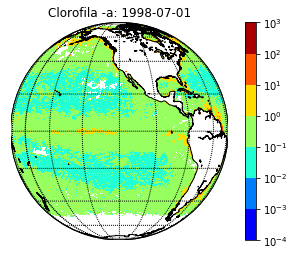

In [16]:
m = Basemap(projection='ortho',lat_0=0,lon_0=-120,resolution='l')
x,y  = np.meshgrid(lon,lat)
X, Y = m(x, y)
m.drawcoastlines()
m.drawparallels(np.arange(-80.,81.,20.))
m.drawmeridians(np.arange(-180.,181.,20.))
m.drawmapboundary(fill_color='white')
cs = m.contourf(X,Y,clo[9],cmap=plt.cm.jet,norm = LogNorm())
plt.title('Clorofila -a: '+t[9].strftime("%Y-%m-%d"))
plt.colorbar(cs)
plt.show()

Nótese los altos valores de clorofila para el mes de julio de 1998, año conocido por la ocurrencia de La Niña. Nótese además que estos valores a los largo del ecuador y en las costas de Perú y Ecuador. Porqué?

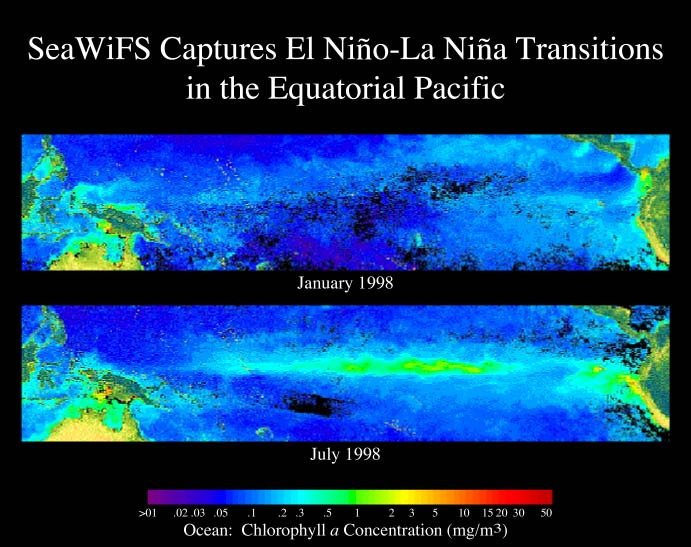

In [17]:
Image ('https://oceancolor.gsfc.nasa.gov/SeaWiFS/BACKGROUND/Gallery/pac_elnino.jpg',width=800)


# TAREA
## Realice un mapa de clorofila que contenga al territorio marítimo del Ecuador, para los meses Enero de 1998, Julio de 1998. Comente los resultados.